<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/TaylorSeries_sinx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Taylor Series for $\sin x$</h1></b>

Dr. Bingsen Wang

11/5/2024
</center>

#Python Code


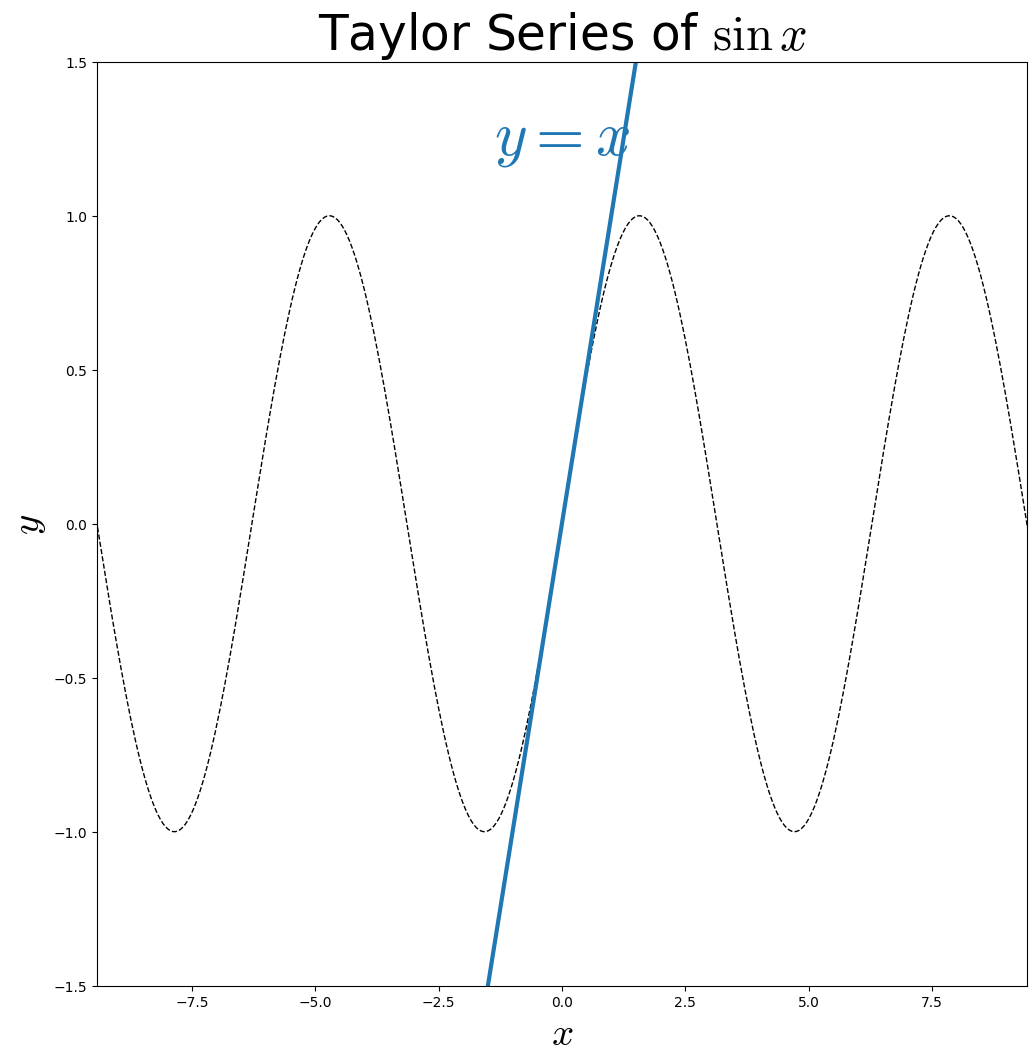

In [89]:
from numpy import linspace,cos,sin,arccos,pi,abs,sqrt,sum
from math import factorial
from matplotlib import animation,pyplot,cm
pyplot.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})
def ts_sin(x,n):
  y=0
  for i in range(n+1):
    y+=(-1)**i*x**(2*i+1)/factorial(2*i+1)
  return y

# def ts_sin(x,n):
#   return sum([x**(2*i+1)/factorial(2*i+1) for i in range(n)])

def str_yn(x,k):
  if k==0:
    yn = 'x'
  else:
    yn = str_yn(x,k-1)+['+','-'][k%2]+r'\frac{x^{'+str(2*k+1)+'}}{'+str(2*k+1)+'!}'
  return yn

Nf=10
clst = list(cm.tab10.colors) #colors of lines
x = linspace(-4*pi,4*pi,500)
tsn_lst = [x]
[tsn_lst.append(ts_sin(x,i)) for i in range(1,Nf)]
fig = pyplot.figure(figsize=([12,12]))
ax = fig.add_subplot(111,xlim=(-3*pi,3*pi),ylim=(-1.5,1.5))
ax.set_title('Taylor Series of $\sin x$',size=35)
ax.set_xlabel('$x$',size=28),ax.set_ylabel('$y$',size=28)
ax.plot(x,sin(x),'--k',lw=1)
txt = ax.text(0,1.25,'',size=25,ha='center',va='center')
lines=[ax.plot([],[],lw=3,c=clst[i%len(clst)])[0] for i in range(len(tsn_lst))]
def animate(i):
  # i=Nf-1
  txt.set_text("$y="+str_yn(x,i)+'$')
  txt.set_color(clst[i%len(clst)])
  txt.set_fontsize(45-i/Nf*18)
  lines[i-1].set_data([],[])
  lines[i].set_data(x,tsn_lst[i])
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
anim.save("TaylorSeries_sinx.mp4", writer=animation.FFMpegWriter(fps=1/1.5), dpi = 300)